<center><img src="images/redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex exploratory data analysis skills and dive into the entertainment industry.

In this project we did some research on movies released in the 1990's. We have the following dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. 

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [ ]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


# Dataset Structure and Overview

I begin by exploring the overall structure of the dataset, I examine the size of the data, the data types of each column, and the presence of missing values. This helps identify potential data quality issues and informs any necessary cleaning steps before analysis. Understanding the data types ensures that numerical and categorical variables are handled appropriately during analysis.

In [ ]:
# Shape of the dataset
netflix_df.shape

(4812, 11)

In [ ]:
# Column names , Null value count and data types
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


**Summary Statistics of Numerical Features**

We used pandas function describe(), which is a one-click summary report of numerical columns 


In [ ]:
netflix_df.describe().round(2)

,release_year,duration
count,4812.00,4812.00
mean,2012.71,99.57
std,9.52,30.89
min,1942.00,1.00
25%,2011.00,88.00
50%,2016.00,99.00
75%,2018.00,116.00
max,2021.00,253.00


**Outcomes of summary statistics**

Netflix movies are predominantly recent, with a median release year of 2016.  
Typical movie duration is around 100 minutes, but duration shows high variability, indicating the presence of both very short and very long titles.

**Key takeaways:**
- Netflix’s catalog is heavily skewed toward modern content  
- Average movie length is ~100 minutes  
- Duration contains clear outliers (e.g., 1 min, 253 min)  
- Mean ≈ median, suggesting a fairly balanced distribution  

~~    ~~

**Missing Value Assessment**

Next we are checking for missing values. It helps assess data completeness and reliability.
Identifying missing entries early allows informed decisions on whether to remove, impute, or retain affected records during analysis.

In [ ]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

# Distribution of most frequent movie durations in the 90s (visual insight)

We checked what was the most frequent movie duration in the 1990s and visualised it using the histogram

In [ ]:
dfnew = (netflix_df[["release_year", "duration", "country", "genre"]])
print(dfnew)

      release_year  duration        country             genre
0             2016        93         Mexico            Dramas
1             2011        78      Singapore     Horror Movies
2             2009        80  United States            Action
3             2008       123  United States            Dramas
4             2016         1         Turkey  International TV
...            ...       ...            ...               ...
4807          2009        88  United States          Comedies
4808          2018        94          India            Dramas
4809          2006        88  United States          Children
4810          2005        99         Sweden            Dramas
4811          2015       111          India            Dramas

[4812 rows x 4 columns]


In [ ]:
nineties = dfnew[
    (dfnew["release_year"] >= 1990) &
    (dfnew["release_year"] < 2000)
]

print(nineties)

      release_year  duration        country           genre
6             1997       119  United States          Dramas
118           1993       101  United States          Dramas
145           1998        82  United States        Comedies
167           1996       108  United States        Comedies
194           1993       154          India          Dramas
...            ...       ...            ...             ...
4672          1999       106         France          Dramas
4689          1993       118  United States  Classic Movies
4718          1999       106  United States          Action
4746          1994       191  United States          Action
4756          1994       148          India          Dramas

[184 rows x 4 columns]


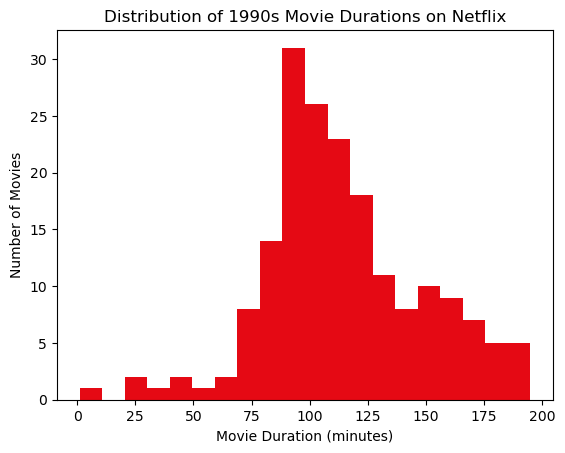

In [ ]:
plt.hist(nineties["duration"], bins=20, color="#e50914")
plt.xlabel("Movie Duration (minutes)")
plt.ylabel("Number of Movies")
plt.title("Distribution of 1990s Movie Durations on Netflix")
plt.show()

Most movies fall within the 80–100 minute range, though notable outliers exist.

In [ ]:
duration = int(nineties["duration"].mode()[0])

In [ ]:
print(duration)

94


# Year by Year Trend - Time Analysis
Did movie lengths change during the 90s?

In [ ]:
yearly_duration = (
    nineties
    .groupby("release_year")["duration"]
    .mean()
)

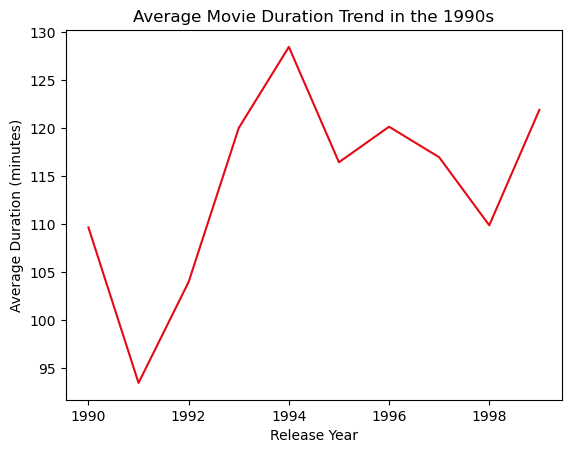

In [ ]:
plt.plot(yearly_duration.index, yearly_duration.values, color="#e50914")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.title("Average Movie Duration Trend in the 1990s")
plt.show()

Outcomes: The graph shows noticeable changes in movie duration over time, with the longest average duration occurring in the mid-1990s.

# Geographical Perspective
Here we checked the major film-producing countries in 1990s, reflecting global cinema trends of the time.

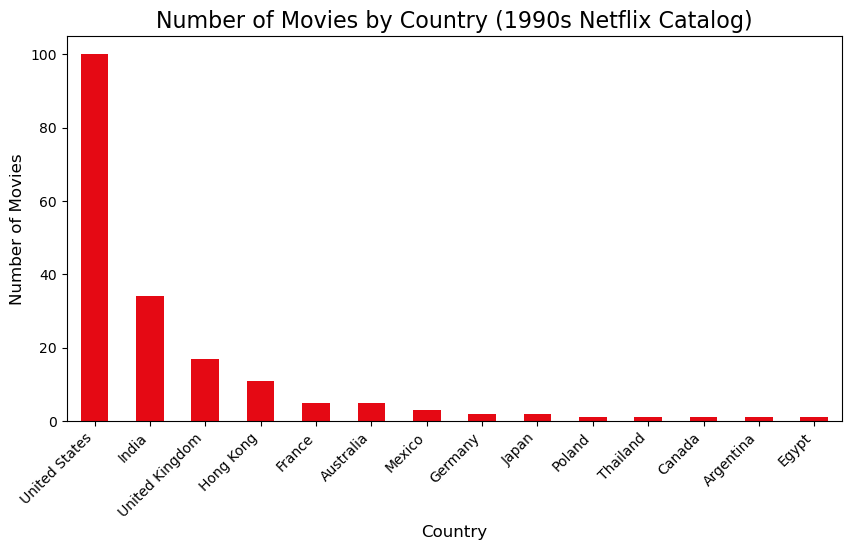

In [ ]:
country_count = nineties["country"].value_counts()
country_count.plot(kind="bar", figsize=(10, 5), color="#e50914")
plt.title("Number of Movies by Country (1990s Netflix Catalog)", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

The United States contributed the highest number of movies in the dataset

# Which genres dominated 1990s movies?

In [ ]:
genre_counts = nineties["genre"].value_counts()
genre_counts

Action            48
Dramas            44
Comedies          40
Children          15
Classic Movies    15
Stand-Up           8
Thrillers          5
Horror Movies      4
Documentaries      2
Cult Movies        2
Docuseries         1
Name: genre, dtype: int64

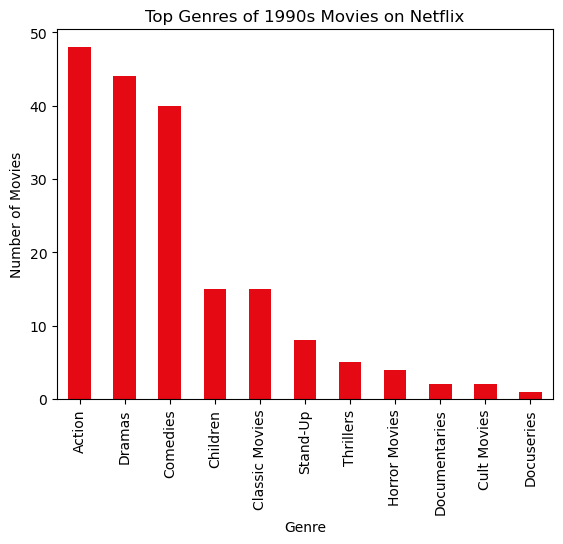

In [ ]:
genre_counts.plot(kind="bar", color="#e50914")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top Genres of 1990s Movies on Netflix")
plt.show()

The above result clearly shows Action, Dramas and Comedies dominates the decade(90s)

# Short Action Movies

A movie is considered short if it is less than 90 minutes. Here we counted the number of shortest "action movies" released in the 1990s.

In [ ]:
short_action_movies = nineties[(nineties["duration"] < 90) & (nineties["genre"] == "Action")]
print(short_action_movies)

      release_year  duration        country   genre
1288          1998        69          Japan  Action
1698          1997        89      Hong Kong  Action
2328          1990        88      Hong Kong  Action
2993          1992        84  United States  Action
3297          1995        89      Hong Kong  Action
3806          1993        83      Hong Kong  Action
3943          1997        87          Japan  Action


In [ ]:
short_movie_count = len(short_action_movies)
print(short_movie_count)

7


Only 7 Action movies are shorter than 90 minutes. Shows that most action movies in the 90s were no less than 1.5 hour. 


# Conclusion - Final Insights


**1. Most Frequent Movie Duration in the 1990s:**

Frequent Movie Length in 90s: Most movies released during the 1990s on Netflix have a runtime of approximately 90 minutes, indicating a standard feature-length format for that decade.

**2. Trend in movie duration Accros the 1990s**

The average movie duration did not remain stable throughout the 1990s, suggesting variations in runtime preferences over the years.

**3. Geographical Perspective**

The United States contributed the highest number of movies in the dataset, followed by India and the United Kingdom. This indicates that 1990s content on Netflix is largely influenced by major film-producing countries, reflecting global cinema trends of the time.

**4. Genre Distribution of 1990s Movies**

In terms of genre Action, Drama, and Comedy dominated the 1990s movie catalog, with Action movies being the most common among them.

**5. Runtime Patterns in Action Movies**

Action movies tend to have longer runtimes, with only 7 Action movies shorter than 90 minutes, indicating that most Action films in the 1990s were at least 90 minutes (1.5 hours) long.

# Business Implications

Content Strategy: Understanding dominant genres and runtimes helps guide content acquisition and licensing strategies.

Recommendation Systems: Runtime and genre patterns can improve personalized recommendations based on viewing preferences.

Regional Insights: Country-level analysis supports region-specific content targeting and investment decisions.

User Engagement: Differentiating short vs long movies can optimize viewer engagement for different audience segments.